<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Time_Series_analysis_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Decomposition
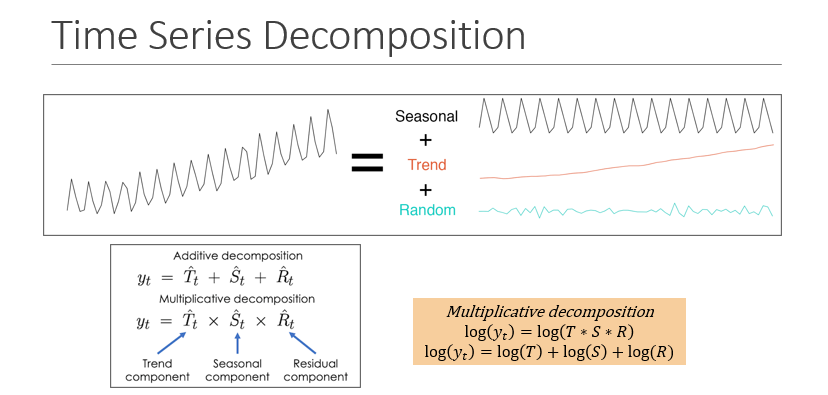

In [1]:
!pip install "numpy<2.0" "pmdarima"

# Restart kernel and run all the cells after installing above package

In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv


In [5]:
import pandas as pd
df = pd.read_csv(url, index_col=0, parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Perform basic data quality checks

In [6]:
df.shape

(144, 1)

In [7]:
df.isna().sum()

,0
Passengers,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Visualize the data

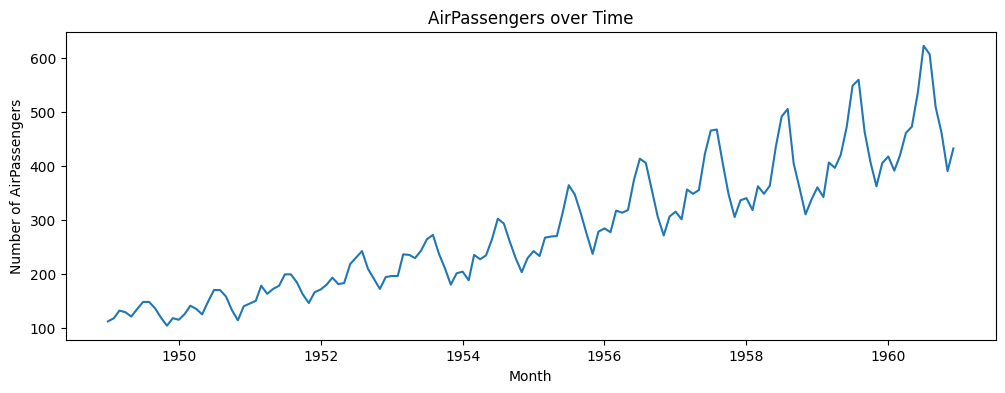

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(df["Passengers"])
plt.xlabel("Month")
plt.ylabel("Number of AirPassengers")
plt.title("AirPassengers over Time")
plt.show()

# Time series decomposition

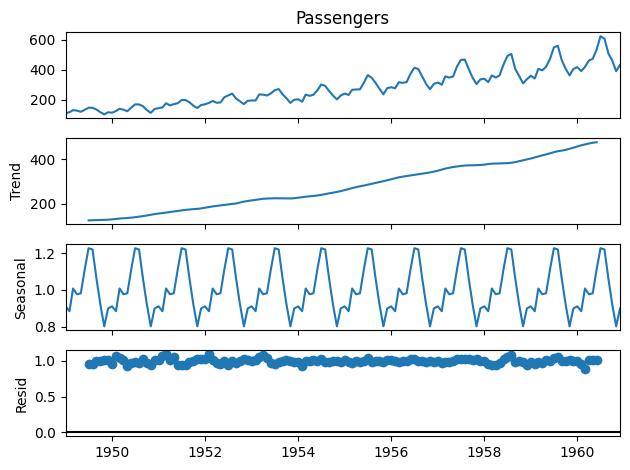

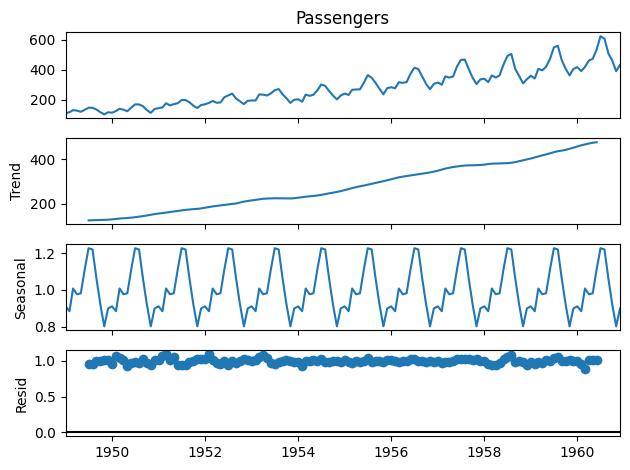

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

q = seasonal_decompose(df["Passengers"], model="mul")
q.plot()

# Plot the trend along with observed

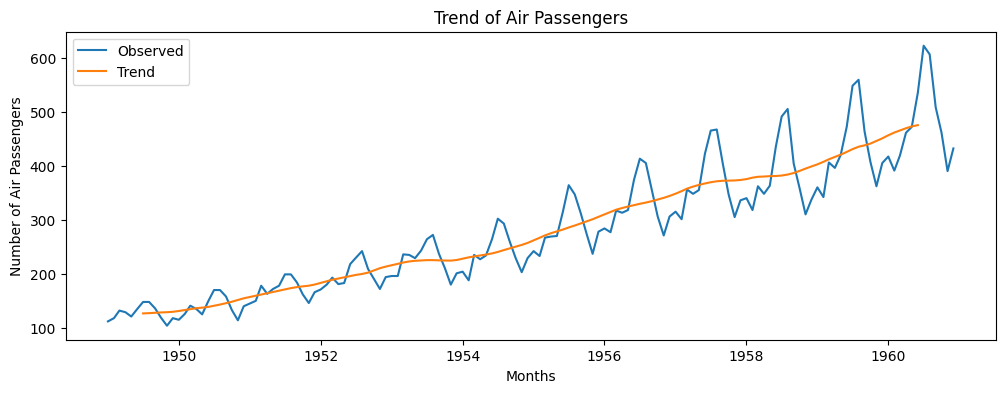

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(q.observed, label="Observed")
plt.plot(q.trend, label="Trend")
plt.xlabel("Months")
plt.ylabel("Number of Air Passengers")
plt.title("Trend of Air Passengers")
plt.legend()
plt.show()

# Seasonality Plot

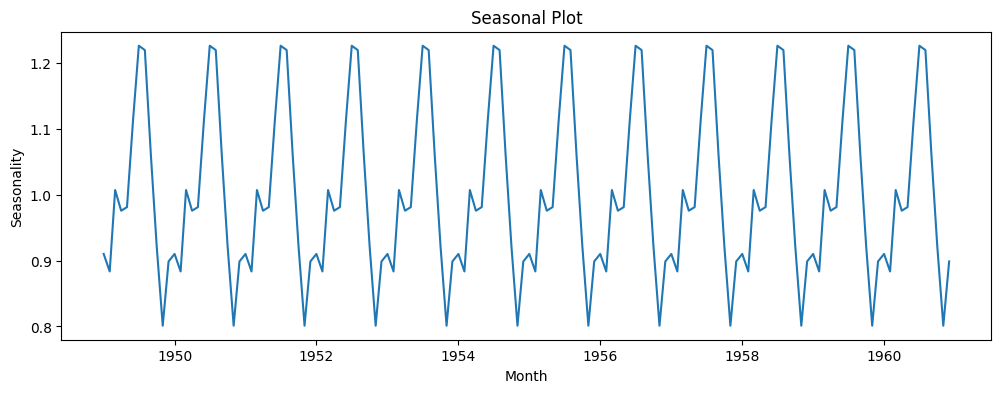

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(q.seasonal)
plt.xlabel("Month")
plt.ylabel("Seasonality")
plt.title("Seasonal Plot")
plt.show()

# Residual plots

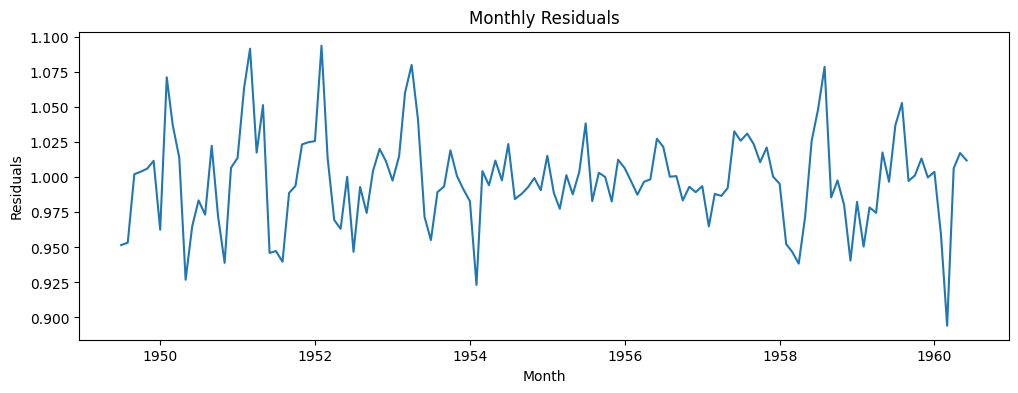

In [17]:
plt.figure(figsize=(12, 4))
plt.plot(q.resid)
plt.xlabel("Month")
plt.ylabel("Residuals")
plt.title("Monthly Residuals")
plt.show()

# Time series forecasting
1. You have monthly data
2. Seasonal pattern i observed is repeated every year
3. m = 12

In [19]:
from warnings import filterwarnings
filterwarnings("ignore")

In [20]:
from pmdarima.arima import auto_arima

model = auto_arima(df["Passengers"], seasonal=True, m=12)

In [21]:
model.order

(2, 1, 1)

In [22]:
model

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

# Forecast future values upto 3 years

In [23]:
n = 3
m = n*12

forecast, conf_int = model.predict(n_periods=m, return_conf_int=True)

In [24]:
forecast

,0
1961-01-01,445.634924
1961-02-01,420.395010
1961-03-01,449.198328
1961-04-01,491.839952
1961-05-01,503.394475
1961-06-01,566.862441
1961-07-01,654.260157
1961-08-01,638.597459
1961-09-01,540.883703
1961-10-01,494.126573


In [28]:
conf_int

array([[423.3448346 , 467.92501276],
       [394.23537501, 446.55464442],
       [419.83168422, 478.56497202],
       [460.37622791, 523.30367657],
       [470.38041866, 536.40853182],
       [532.69928309, 601.02559869],
       [619.22109181, 689.29922222],
       [602.87979331, 674.3151249 ],
       [504.6311681 , 577.1362384 ],
       [457.44579915, 530.80734671],
       [386.30368922, 460.36161495],
       [428.1911504 , 502.8238715 ],
       [433.49731294, 525.08429446],
       [405.10864692, 503.24491676],
       [431.15538434, 535.01845673],
       [471.84027967, 579.79808509],
       [481.87329418, 593.02793   ],
       [544.15629206, 657.81137512],
       [630.60845165, 746.26538783],
       [614.17884156, 731.46356577],
       [515.8320561 , 634.46256831],
       [468.54374041, 588.30427377],
       [397.29688215, 518.02069215],
       [439.07953624, 560.63646162],
       [446.326804  , 580.99710658],
       [418.31787371, 558.81305956],
       [444.62390274, 590.35706201],
 

In [26]:
df_forecast = forecast.to_frame()
df_forecast.columns = ["Forecast"]

In [27]:
df_forecast

,Forecast
1961-01-01,445.634924
1961-02-01,420.395010
1961-03-01,449.198328
1961-04-01,491.839952
1961-05-01,503.394475
1961-06-01,566.862441
1961-07-01,654.260157
1961-08-01,638.597459
1961-09-01,540.883703
1961-10-01,494.126573


In [30]:
df_forecast[["lower", "upper"]] = conf_int

In [31]:
df_forecast

,Forecast,lower,upper
1961-01-01,445.634924,423.344835,467.925013
1961-02-01,420.395010,394.235375,446.554644
1961-03-01,449.198328,419.831684,478.564972
1961-04-01,491.839952,460.376228,523.303677
1961-05-01,503.394475,470.380419,536.408532
1961-06-01,566.862441,532.699283,601.025599
1961-07-01,654.260157,619.221092,689.299222
1961-08-01,638.597459,602.879793,674.315125
1961-09-01,540.883703,504.631168,577.136238
1961-10-01,494.126573,457.445799,530.807347


In [32]:
df_forecast = df_forecast.round(0).astype(int)
df_forecast

,Forecast,lower,upper
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536
1961-06-01,567,533,601
1961-07-01,654,619,689
1961-08-01,639,603,674
1961-09-01,541,505,577
1961-10-01,494,457,531


In [35]:
df_forecast.index.name = "Month"

In [36]:
df_forecast.head()

,Forecast,lower,upper
Month,,,
1961-01-01,446,423,468
1961-02-01,420,394,447
1961-03-01,449,420,479
1961-04-01,492,460,523
1961-05-01,503,470,536


In [37]:
df_forecast.to_csv("results.csv")

# Visualize the data

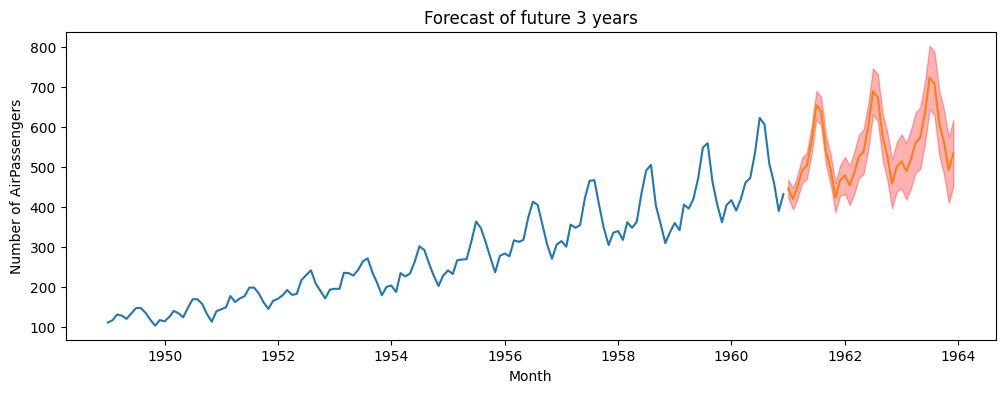

In [41]:
plt.figure(figsize=(12, 4))
plt.plot(df["Passengers"], label="Actual")
plt.plot(df_forecast["Forecast"], label="Forecast")
plt.fill_between(
    df_forecast.index,
    df_forecast["lower"],
    df_forecast["upper"],
    color="red",
    alpha=0.3
)
plt.xlabel("Month")
plt.ylabel("Number of AirPassengers")
plt.title("Forecast of future 3 years")
plt.show()

# Save the model object

In [42]:
import joblib

joblib.dump(model, "passenger_model.joblib")

['passenger_model.joblib']

# Load the model object

In [43]:
m = joblib.load("passenger_model.joblib")
m

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [44]:
m.order

(2, 1, 1)